In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('./accepted_2007_to_2018Q4.csv')
data


C:\Users\user\AppData\Local\Temp\ipykernel_22564\1531703685.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./accepted_2007_to_2018Q4.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.00,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.00,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN

In [3]:
columns_to_keep = ['loan_amnt','int_rate','installment','emp_title','emp_length','home_ownership','annual_inc','issue_d','loan_status','purpose','dti','earliest_cr_line','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies','zip_code','addr_state', 'grade']

# 컬럼 제외하고 나머지 삭제
data.drop(columns=[col for col in data.columns if col not in columns_to_keep], inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   int_rate              float64
 2   installment           float64
 3   grade                 object 
 4   emp_title             object 
 5   emp_length            object 
 6   home_ownership        object 
 7   annual_inc            float64
 8   issue_d               object 
 9   loan_status           object 
 10  purpose               object 
 11  zip_code              object 
 12  addr_state            object 
 13  dti                   float64
 14  earliest_cr_line      object 
 15  open_acc              float64
 16  pub_rec               float64
 17  revol_bal             float64
 18  revol_util            float64
 19  total_acc             float64
 20  mort_acc              float64
 21  pub_rec_bankruptcies  float64
dtypes: float64(12), object(10)
memory usage: 3

In [5]:
pd.options.display.float_format = '{:.5f}'.format

In [6]:
target = data['loan_status']

In [7]:
import plotly.express as px


data.describe().T\
    .style.bar(subset=['mean'], color=px.colors.qualitative.G10[2])\
    .background_gradient(subset=['std'], cmap='Blues')\
    .background_gradient(subset=['50%'], cmap='BuGn')
    

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2260668.000000,15046.931228,9190.245488,500.000000,8000.000000,12900.000000,20000.000000,40000.000000
int_rate,2260668.000000,13.092829,4.832138,5.310000,9.490000,12.620000,15.990000,30.990000
installment,2260668.000000,445.806823,267.173535,4.930000,251.650000,377.990000,593.320000,1719.830000
annual_inc,2260664.000000,77992.428687,112696.199574,0.000000,46000.000000,65000.000000,93000.000000,110000000.000000
dti,2258957.000000,18.824196,14.183329,-1.000000,11.890000,17.840000,24.490000,999.000000
open_acc,2260639.000000,11.612402,5.640861,0.000000,8.000000,11.000000,14.000000,101.000000
pub_rec,2260639.000000,0.197528,0.570515,0.000000,0.000000,0.000000,0.000000,86.000000
revol_bal,2260668.000000,16658.458078,22948.305028,0.000000,5950.000000,11324.000000,20246.000000,2904836.000000
revol_util,2258866.000000,50.337696,24.713073,0.000000,31.500000,50.300000,69.400000,892.300000
total_acc,2260639.000000,24.162552,11.987528,1.000000,15.000000,22.000000,31.000000,176.000000


In [8]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['결측치 개수'] = df.isna().sum()
    sum['결측치 비율'] = (df.isna().sum())/len(df)
    sum['고유값 개수'] = df.nunique().values
    sum['데이터 개수'] = df.count().values


    return sum

summary(data).style.background_gradient(cmap='Blues')

,dtypes,결측치 개수,결측치 비율,고유값 개수,데이터 개수
loan_amnt,float64,33,0.000015,1572,2260668
int_rate,float64,33,0.000015,673,2260668
installment,float64,33,0.000015,93301,2260668
grade,object,33,0.000015,7,2260668
emp_title,object,167002,0.073872,512694,2093699
emp_length,object,146940,0.064998,11,2113761
home_ownership,object,33,0.000015,6,2260668
annual_inc,float64,37,0.000016,89368,2260664
issue_d,object,33,0.000015,139,2260668
loan_status,object,33,0.000015,9,2260668


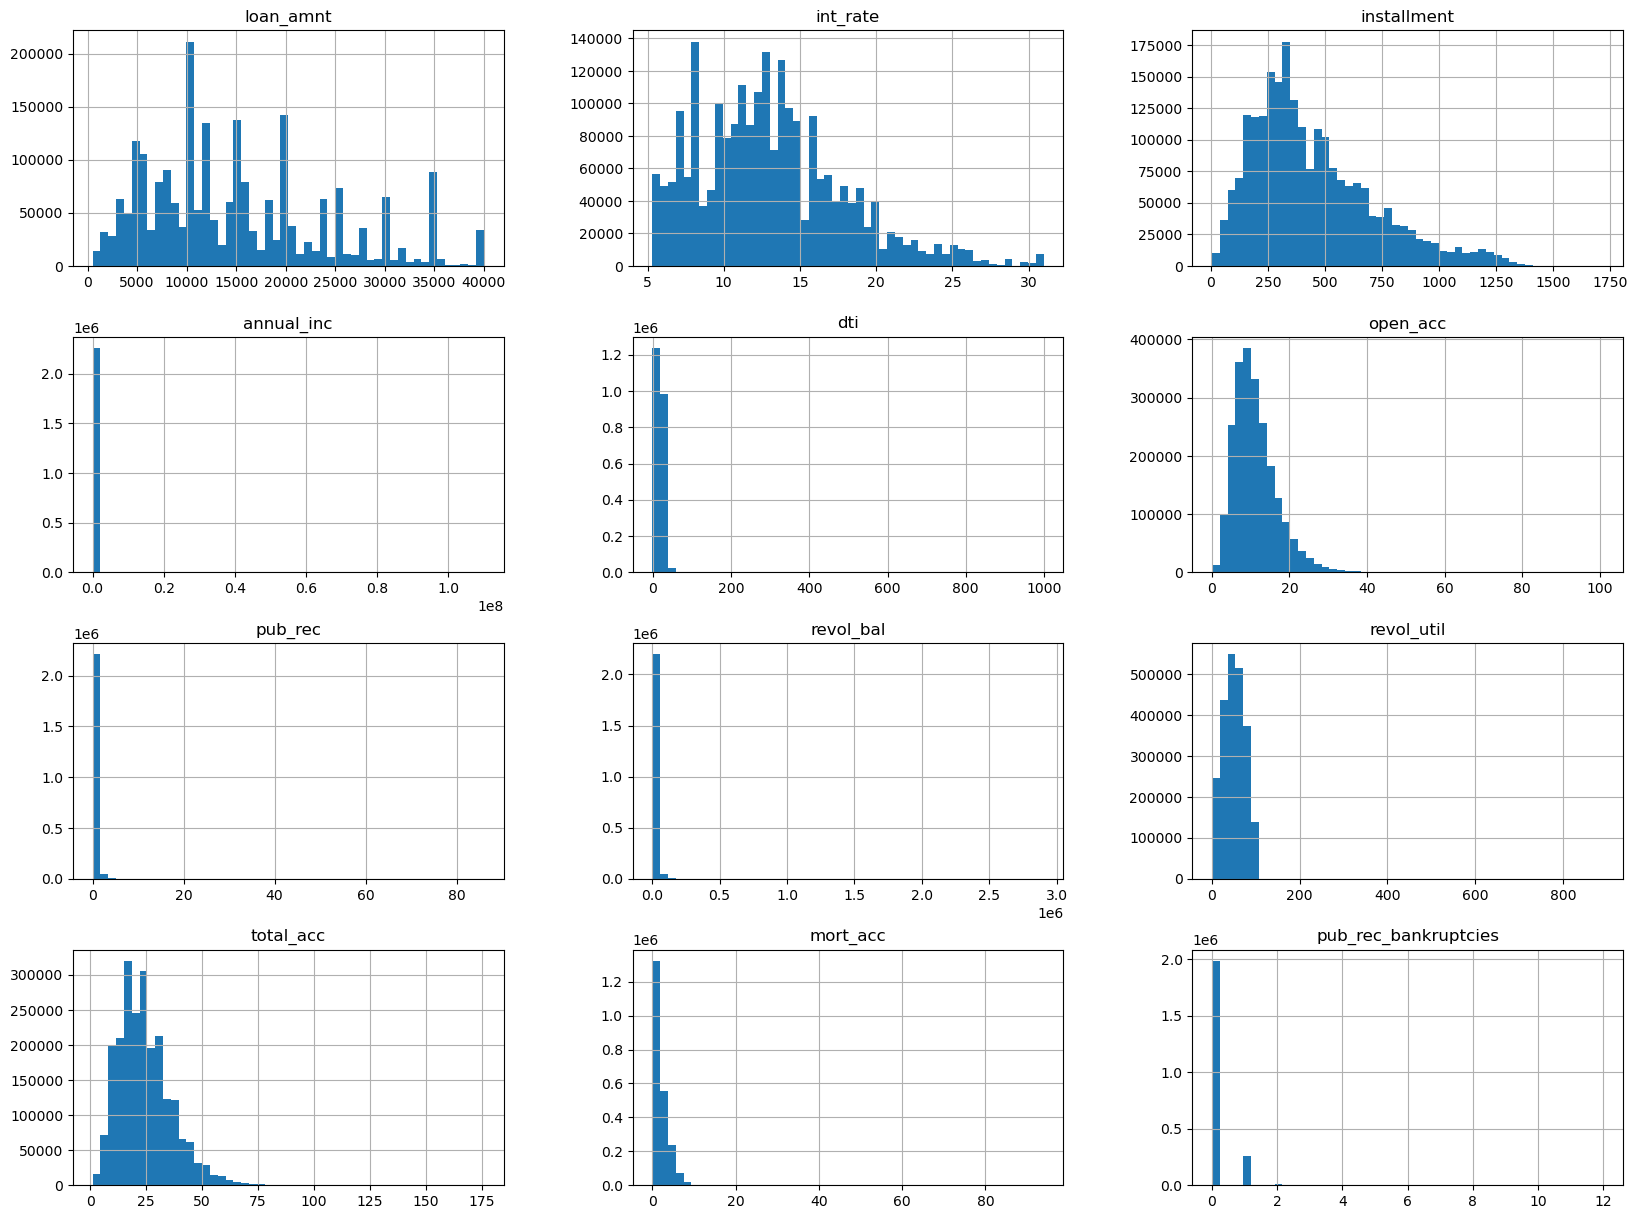

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(
    bins=50,
    figsize=(20, 15),
)

plt.show()

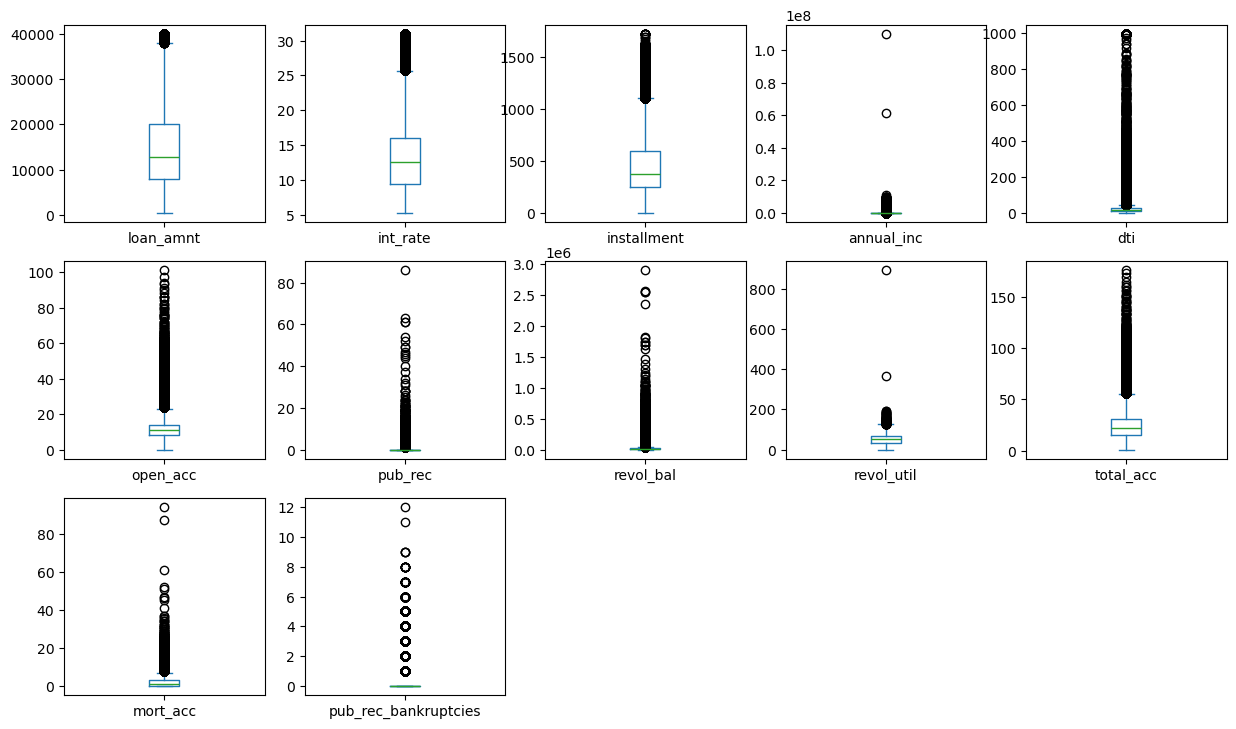

In [10]:
data.plot(kind='box', subplots=True, layout=(7, 5), figsize=(15, 21))
plt.show()

## feature 정리


명목형 : home_ownership , loan_status , purpose , zip_code , earliest_cr_line , issue_d

순서형 : emp_length

이진 분류로 변경 (해도 될까 ? ): annual_inc,  pub_rec , revol_bal  


------

EDA 이후 삭제한 피처들

addr_state , pub_rec_bankruptcies

------

참고 : earliest_cr_line , issue_d 의 경우 , 추후 현재 날짜 - 기존 날짜로 총합 계산



<계획>
날짜 피처 : earliest_cr_line , issue_d  -> ohe
명목형 : ohe
순서형 : ord

In [11]:
data['earliest_cr_line'].fillna(0)

0          Aug-2003
1          Dec-1999
2          Aug-2000
3          Sep-2008
4          Jun-1998
             ...   
2260696    Feb-1995
2260697    Jul-1999
2260698    Jun-1996
2260699           0
2260700           0
Name: earliest_cr_line, Length: 2260701, dtype: object

In [12]:
data.drop_duplicates(inplace = True)

In [13]:
emp_title_other = data['emp_title']
emp_title_other = emp_title_other.to_frame()
emp_title_other_ = emp_title_other.applymap(lambda x: 1 if pd.notnull(x) else x)
emp_title_other_.fillna(0 , inplace= True)
data['emp'] = emp_title_other_

In [14]:
data = data.drop('emp_title',  axis = 1)

Text(0.5, 1.0, 'loan_status')

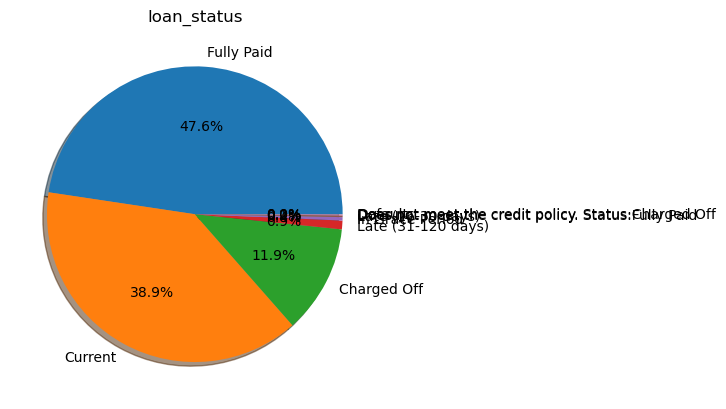

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(data['loan_status'].value_counts(), labels=data['loan_status'].value_counts().index, autopct='%.1f%%', shadow = True)
plt.title('loan_status')



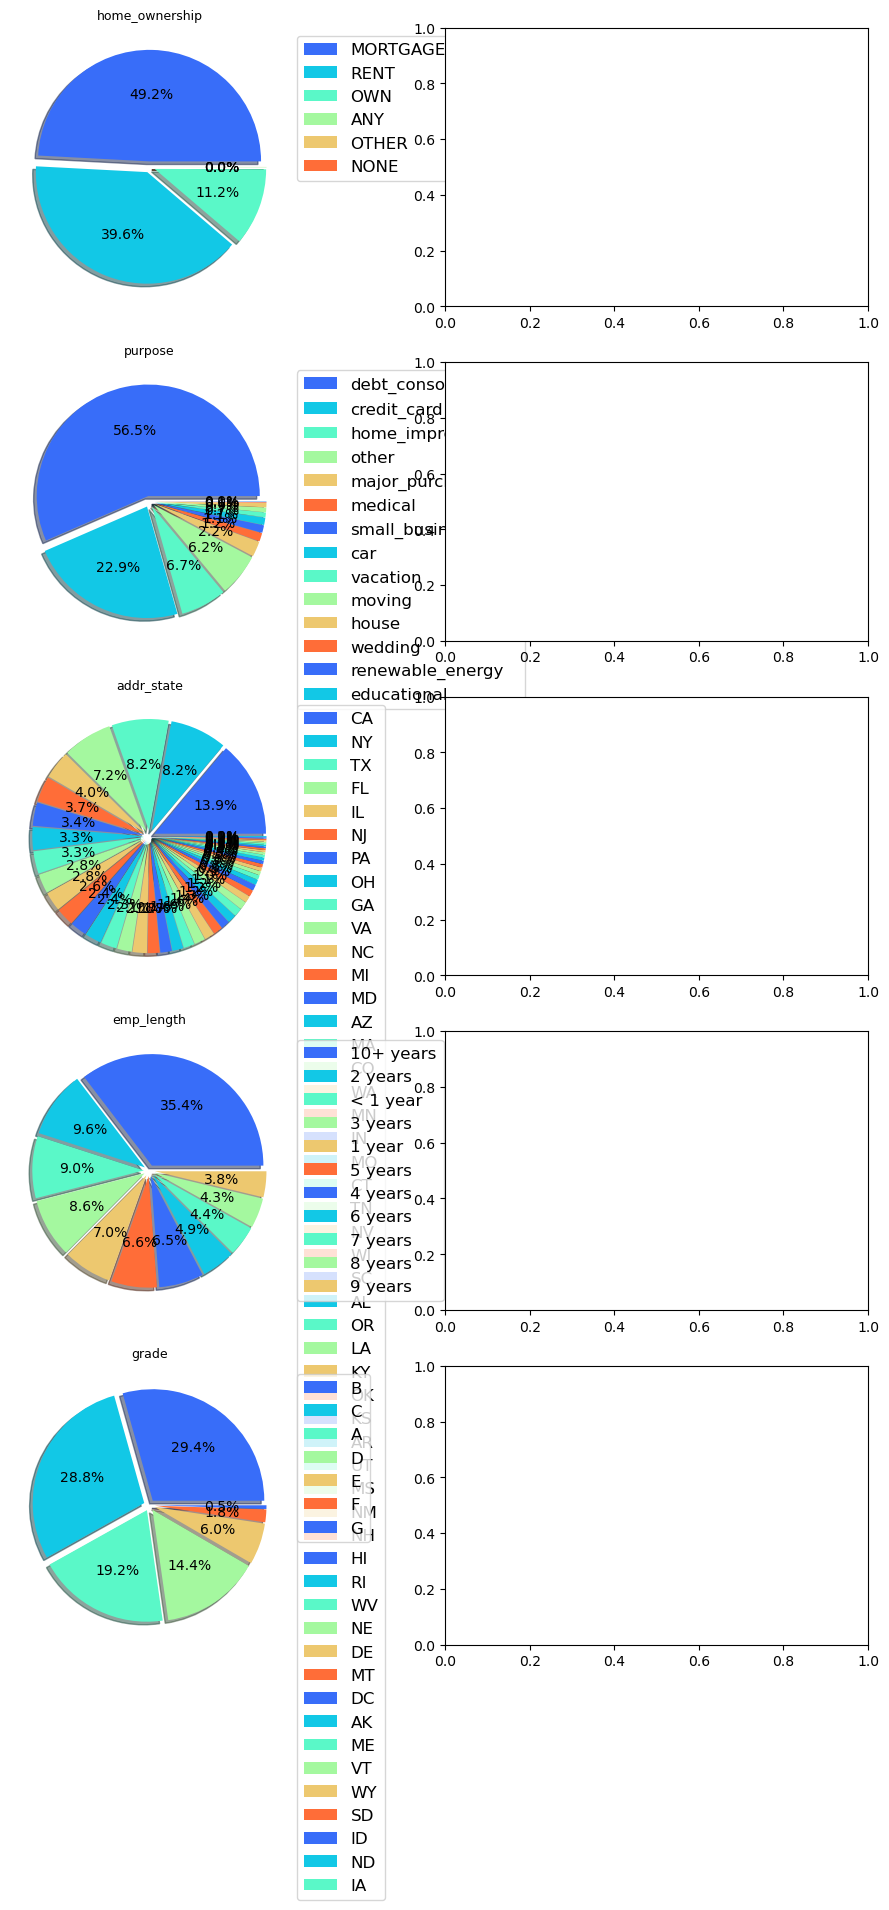

In [16]:
sns.set_palette('rainbow')

num = ['home_ownership'  , 'purpose' , 'addr_state' , 'emp_length' , 'grade']

fig, axes = plt.subplots(len(num), 2 ,figsize = (12, len(num) * 4.2))

df = pd.concat([data[num].assign(Source = 'data')],
               axis=0, ignore_index = True)

for i,col in enumerate(num):
    data_dist = df.loc[df.Source =='data', [col]].value_counts()
  
    ax = axes[i,0]
    ax.pie(data_dist, shadow=True, explode=[.05]*len(data_dist), autopct='%.1f%%')
    ax.legend([category[0] for category in data_dist.index], loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title(f'{col}',fontsize = 9)

  
#plt.suptitle(f"\nDistribution analysis - categorical features\n",fontsize = 15, y = 0.9, x = 0.57)
plt.show()

https://matplotlib.org/stable/api/prev_api_changes/api_changes_3.7.0.html#deprecation-of-top-level-cmap-registration-and-access-functions-in-mpl-cm
왜 지원안하고 질알...

In [17]:
import numpy as np

corr = data.corr(numeric_only=True)

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)) 
corr.style.background_gradient(cmap='Blues')


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\pandas\io\formats\style.py:3926: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\pandas\io\formats\style.py:3927: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,emp
loan_amnt,nan,0.098082,0.945625,0.197246,0.043542,0.182229,-0.058772,0.316715,0.099078,0.199570,0.219051,-0.083562,0.073250
int_rate,nan,nan,0.123949,-0.050583,0.124491,-0.010472,0.053381,-0.028880,0.262670,-0.040951,-0.090105,0.056653,-0.004643
installment,nan,nan,nan,0.190270,0.044841,0.171445,-0.047035,0.302816,0.120951,0.178342,0.184379,-0.075078,0.063839
annual_inc,nan,nan,nan,nan,-0.082619,0.094377,-0.002543,0.190760,0.028207,0.115271,0.134760,-0.027132,0.058247
dti,nan,nan,nan,nan,nan,0.186124,-0.026029,0.102147,0.115225,0.147335,-0.009555,-0.012379,-0.060112
open_acc,nan,nan,nan,nan,nan,nan,-0.014849,0.237097,-0.134632,0.717911,0.134421,-0.016412,0.067464
pub_rec,nan,nan,nan,nan,nan,nan,nan,-0.085610,-0.051795,0.003846,-0.011473,0.659237,-0.030946
revol_bal,nan,nan,nan,nan,nan,nan,nan,nan,0.245087,0.204726,0.213466,-0.108887,0.034006
revol_util,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.093147,0.038338,-0.073866,0.048064
total_acc,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.367873,0.022968,0.045374


In [18]:
# 이진 분류 기준 적용
data['loan_status'] = data['loan_status'].apply(lambda x: 0 if x in ['Fully Paid', 'Current'] else 1)

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

def plot_target_ratio_by_features(data, features, size = (12,18)):

  plt.rc('font' , size = 9)
  plt.figure(figsize = size) # 전체 Figure 크기 설정

  # 특성 개수를 기반으로 필요한 행 수 계산
  num_rows = (len(features) + 1) // 2  # 특성 개수가 홀수인 경우 처리하기 위해 +1

  # 모든 특성을 수용하도록 GridSpec 업데이트
  grid = gridspec.GridSpec(num_rows, 2) # 서브 플롯 배치

  plt.subplots_adjust(wspace = 0.4, hspace = 0.3) # 서브플롯 간 좌우/상하 여백 설정

  for idx, feature in enumerate(features):
    ax = plt.subplot(grid[idx])

    # ax축에 고윳값별 타깃값 1의 비율을 막대그래프로 그리기
    sns.barplot(x = data[feature],
                y= data['loan_status'],
                data = data,
                palette = 'Set2',
                ax=ax
                )
    ax.invert_yaxis()

In [20]:
data['loan_status'].value_counts()

0    1955068
1     305601
Name: loan_status, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_22564\4203806778.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data[feature],
C:\Users\user\AppData\Local\Temp\ipykernel_22564\4203806778.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data[feature],
C:\Users\user\AppData\Local\Temp\ipykernel_22564\4203806778.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data[feature],
C:\Users\user\AppData\Local\Temp\ipykernel_22564\4203806778.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

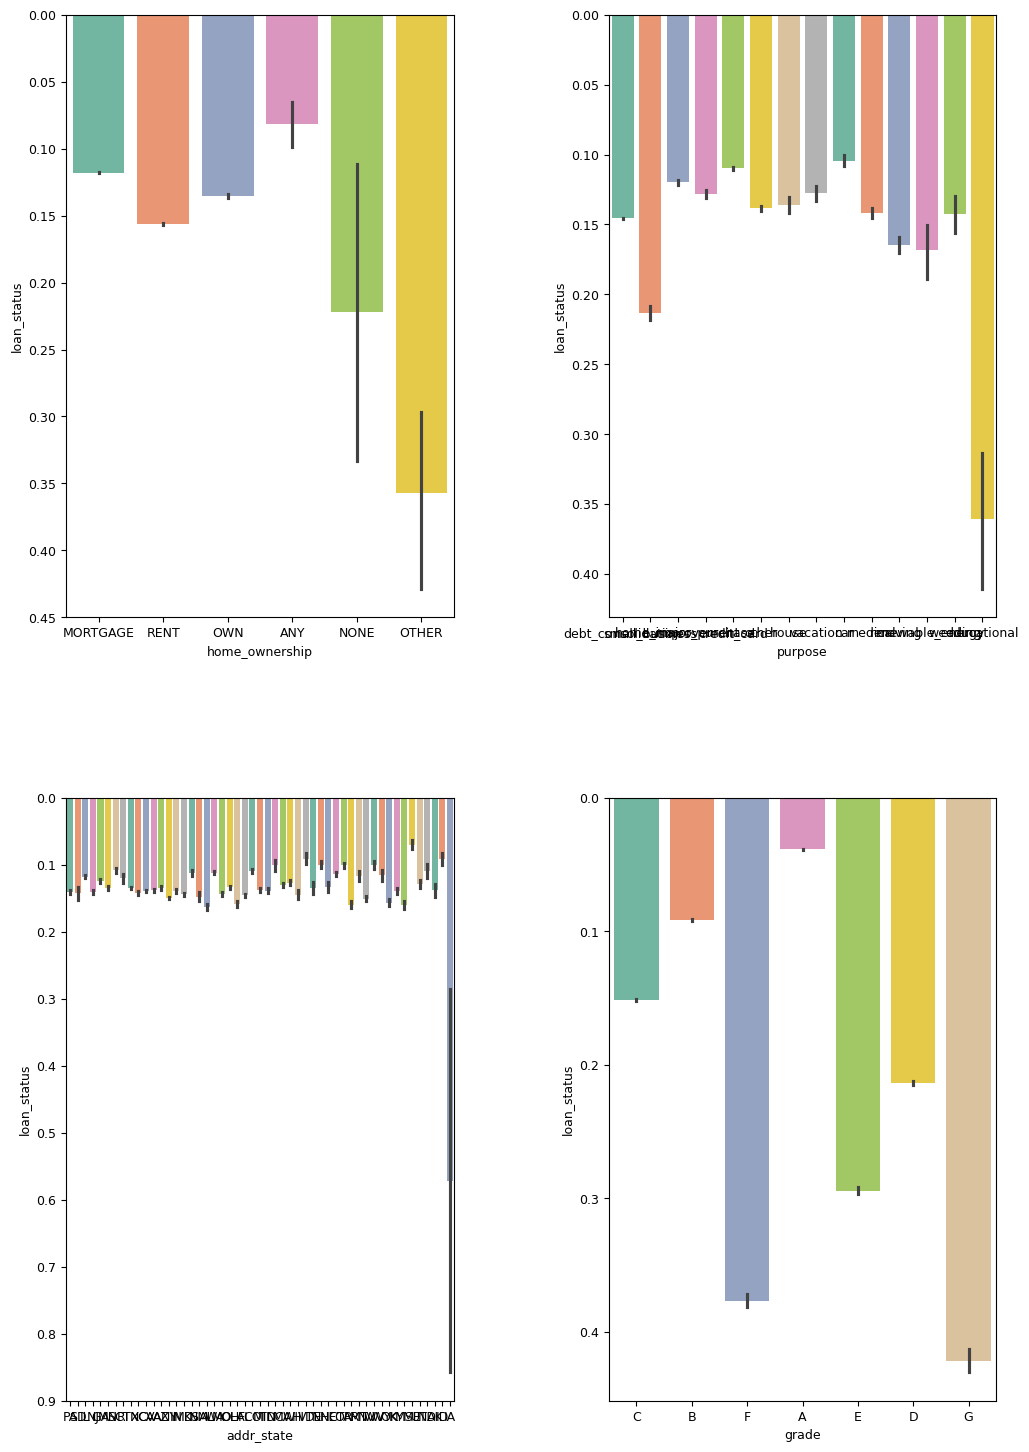

In [21]:
nom_features = ['home_ownership' , 'purpose' , 'addr_state','grade']
plot_target_ratio_by_features(data , nom_features , size = (12,18))

In [22]:
data.drop('pub_rec_bankruptcies' , axis = 1 , inplace=True)
data

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,emp
0,3600.00000,13.99000,123.03000,C,10+ years,MORTGAGE,55000.00000,Dec-2015,0,debt_consolidation,190xx,PA,5.91000,Aug-2003,7.00000,0.00000,2765.00000,29.70000,13.00000,1.00000,1.00000
1,24700.00000,11.99000,820.28000,C,10+ years,MORTGAGE,65000.00000,Dec-2015,0,small_business,577xx,SD,16.06000,Dec-1999,22.00000,0.00000,21470.00000,19.20000,38.00000,4.00000,1.00000
2,20000.00000,10.78000,432.66000,B,10+ years,MORTGAGE,63000.00000,Dec-2015,0,home_improvement,605xx,IL,10.78000,Aug-2000,6.00000,0.00000,7869.00000,56.20000,18.00000,5.00000,1.00000
3,35000.00000,14.85000,829.90000,C,10+ years,MORTGAGE,110000.00000,Dec-2015,0,debt_consolidation,076xx,NJ,17.06000,Sep-2008,13.00000,0.00000,7802.00000,11.60000,17.00000,1.00000,1.00000
4,10400.00000,22.45000,289.91000,F,3 years,MORTGAGE,104433.00000,Dec-2015,0,major_purchase,174xx,PA,25.37000,Jun-1998,12.00000,0.00000,21929.00000,64.50000,35.00000,6.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,24000.00000,12.79000,543.50000,C,7 years,MORTGAGE,95000.00000,Oct-2016,0,home_improvement,356xx,AL,19.61000,Dec-1999,5.00000,0.00000,49431.00000,84.40000,54.00000,0.00000,1.00000
2260695,24000.00000,10.49000,515.74000,B,10+ years,MORTGAGE,108000.00000,Oct-2016,0,debt_consolidation,840xx,UT,34.94000,Feb-1991,24.00000,1.00000,21665.00000,39.00000,58.00000,4.00000,1.00000
2260696,40000.00000,10.49000,859.56000,B,9 years,MORTGAGE,227000.00000,Oct-2016,0,debt_consolidation,907xx,CA,12.75000,Feb-1995,5.00000,0.00000,8633.00000,64.90000,37.00000,3.00000,1.00000
2260697,24000.00000,14.49000,564.56000,C,6 years,RENT,110000.00000,Oct-2016,1,debt_consolidation,334xx,FL,18.30000,Jul-1999,10.00000,1.00000,17641.00000,68.10000,31.00000,2.00000,1.00000


## data 전처리


In [23]:
data.drop(['addr_state'], axis = 1, inplace=True)

In [24]:
data.drop(['zip_code'],axis = 1 , inplace = True)

In [25]:
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format = '%b-%Y')

In [26]:
#import pandas as pd
#from datetime import datetime

#data_c['cr_line_period'] = (datetime.now() - data_c['earliest_cr_line']).dt.days

In [27]:
data['issue_d'] = pd.to_datetime(data['issue_d'],format = '%b-%Y')

In [28]:
data.head(5)

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,emp
0,3600.00000,13.99000,123.03000,C,10+ years,MORTGAGE,55000.00000,2015-12-01,0,debt_consolidation,5.91000,2003-08-01,7.00000,0.00000,2765.00000,29.70000,13.00000,1.00000,1.00000
1,24700.00000,11.99000,820.28000,C,10+ years,MORTGAGE,65000.00000,2015-12-01,0,small_business,16.06000,1999-12-01,22.00000,0.00000,21470.00000,19.20000,38.00000,4.00000,1.00000
2,20000.00000,10.78000,432.66000,B,10+ years,MORTGAGE,63000.00000,2015-12-01,0,home_improvement,10.78000,2000-08-01,6.00000,0.00000,7869.00000,56.20000,18.00000,5.00000,1.00000
3,35000.00000,14.85000,829.90000,C,10+ years,MORTGAGE,110000.00000,2015-12-01,0,debt_consolidation,17.06000,2008-09-01,13.00000,0.00000,7802.00000,11.60000,17.00000,1.00000,1.00000
4,10400.00000,22.45000,289.91000,F,3 years,MORTGAGE,104433.00000,2015-12-01,0,major_purchase,25.37000,1998-06-01,12.00000,0.00000,21929.00000,64.50000,35.00000,6.00000,1.00000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260669 entries, 0 to 2260698
Data columns (total 19 columns):
 #   Column            Dtype         
---  ------            -----         
 0   loan_amnt         float64       
 1   int_rate          float64       
 2   installment       float64       
 3   grade             object        
 4   emp_length        object        
 5   home_ownership    object        
 6   annual_inc        float64       
 7   issue_d           datetime64[ns]
 8   loan_status       int64         
 9   purpose           object        
 10  dti               float64       
 11  earliest_cr_line  datetime64[ns]
 12  open_acc          float64       
 13  pub_rec           float64       
 14  revol_bal         float64       
 15  revol_util        float64       
 16  total_acc         float64       
 17  mort_acc          float64       
 18  emp               float64       
dtypes: datetime64[ns](2), float64(12), int64(1), object(4)
memory usage: 345.0+ MB


## 전처리


명목형 : home_ownership , loan_status , purpose ,  earliest_cr_line , issue_d

순서형 : emp_length




------

EDA 이후 삭제한 피처들

addr_state , pub_rec_bankruptcies

------

참고 : earliest_cr_line , issue_d 의 경우 , 추후 현재 날짜 - 기존 날짜로 총합 계산



<계획>
날짜 피처 : earliest_cr_line , issue_d  -> ohe
명목형 : ohe
순서형 : ord

------

순서형 : ord_num
명목형 : ohe_num


------
이진 분류로 변경 (해도 될까 ? ): annual_inc,  pub_rec , revol_bal  

emp_length -> ordianlencoding 하려고 했는데 염병나서 낭만넘치게 수작업으로 수치화 했음

In [30]:
emp_length_1 = {'< 1 year': 1 , '1 year': 2 , '2 years' : 3 , '3 years': 4 , '4 years' : 5 , '5 years' : 6 , '6 years' : 7 , '7 years': 8 , '8 years':9 ,'9 years': 10 , '10+ years':11}

data['emp_length'] = data['emp_length'].map(emp_length_1)

In [31]:
data['grade'].value_counts()

B    663557
C    650053
A    433027
D    324424
E    135639
F     41800
G     12168
Name: grade, dtype: int64

In [32]:
grade_1 = {'A' : 0 ,'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4, 'F' : 5, 'G' : 6}

data['grade'] = data['grade'].map(grade_1)

In [33]:
data['grade'].value_counts()

1.00000    663557
2.00000    650053
0.00000    433027
3.00000    324424
4.00000    135639
5.00000     41800
6.00000     12168
Name: grade, dtype: int64

In [34]:
from sklearn.preprocessing import MinMaxScaler

Mm_feature = ['emp_length', 'grade']

Mm = MinMaxScaler()

data[Mm_feature] = Mm.fit_transform(data[Mm_feature])

In [35]:
from sklearn.preprocessing import OneHotEncoder

ohe_feature = ['home_ownership'  , 'purpose'  , 'earliest_cr_line' , 'issue_d']

ohe = OneHotEncoder()

ohe_num = ohe.fit_transform(data[ohe_feature])

In [36]:
data.drop(ohe_feature, axis = 1 , inplace = True)

In [37]:
from sklearn.preprocessing import StandardScaler

num_features = ['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc']

std_saller = StandardScaler()

data[num_features] = std_saller.fit_transform(data[num_features])


target (loan_status)는 따로 이진 분류로 전처리 

> 이 부분은 챗지삐띠에게 맏김

----

Fully Paid: 완납
Current: 현재
Charged Off: 상각 처리됨
Late (31-120 days): 연체 (31-120일)
In Grace Period: 유예 기간
Late (16-30 days): 연체 (16-30일)
Does not meet the credit policy. Status:Fully Paid: 신용 정책 미충족. 상태: 완납
Does not meet the credit policy. Status:Charged Off: 신용 정책 미충족. 상태: 상각 처리됨
Default: 채무 불이행

--- 

이진 분류 기준
정상(0): “Fully Paid”, “Current”
비정상(1): 나머지 상태들

In [38]:
data.head(5)

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,emp
0,-1.24555,0.18567,-1.20812,0.33333,1.00000,-0.20402,0,-0.91052,-0.81768,-0.34623,-0.60542,-0.83509,-0.93118,-0.29154,1.00000
1,1.05036,-0.22823,1.40161,0.33333,1.00000,-0.11529,0,-0.19489,1.84149,-0.34623,0.20967,-1.25997,1.15432,1.28328,1.00000
2,0.53895,-0.47863,-0.04921,0.16667,1.00000,-0.13303,0,-0.56716,-0.99496,-0.34623,-0.38301,0.23721,-0.51408,1.80822,1.00000
3,2.17111,0.36364,1.43762,0.33333,1.00000,0.28402,0,-0.12439,0.24599,-0.34623,-0.38593,-1.56750,-0.59750,-0.29154,1.00000
4,-0.50564,1.93645,-0.58350,0.83333,0.30000,0.23462,0,0.46151,0.06871,-0.34623,0.22967,0.57307,0.90406,2.33316,1.00000


모든 데이터 합치기

In [39]:
from scipy import sparse

data_sparse = sparse.hstack([sparse.csr_matrix(data),
                               ohe_num
                               ],
                               
                               format = 'csr')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260669 entries, 0 to 2260698
Data columns (total 15 columns):
 #   Column       Dtype  
---  ------       -----  
 0   loan_amnt    float64
 1   int_rate     float64
 2   installment  float64
 3   grade        float64
 4   emp_length   float64
 5   annual_inc   float64
 6   loan_status  int64  
 7   dti          float64
 8   open_acc     float64
 9   pub_rec      float64
 10  revol_bal    float64
 11  revol_util   float64
 12  total_acc    float64
 13  mort_acc     float64
 14  emp          float64
dtypes: float64(14), int64(1)
memory usage: 276.0 MB


In [41]:
y = data[['loan_status']]

In [42]:
y

,loan_status
0,0
1,0
2,0
3,0
4,0
...,...
2260694,0
2260695,0
2260696,0
2260697,1


In [43]:
type(y)

pandas.core.frame.DataFrame

In [44]:
data = data.drop('loan_status' , axis = 1)

In [56]:
num_train = len(data)

X = data


In [57]:

from sklearn.model_selection import train_test_split

x_train , x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42 , stratify = y)

모델 훈련


In [58]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline 


pipeline = make_pipeline(
    SimpleImputer(strategy='constant', fill_value=0),
    LogisticRegression(max_iter=1000, random_state=42)
)

pipeline.fit(x_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [59]:
from sklearn.metrics import roc_auc_score

# 검증 데이터를 활용한 타깃 예측

y_valid_preds = pipeline.predict(x_valid)

# 'multi_class' 매개변수를 'ovo' 또는 'ovr'로 설정
roc_auc = roc_auc_score(y_valid, y_valid_preds, multi_class='ovr')

print(f"검증 데이터 ROC AUC : {roc_auc :.4f}" )


검증 데이터 ROC AUC : 0.5076


In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_valid , y_valid_preds))



              precision    recall  f1-score   support

           0       0.87      1.00      0.93    391014
           1       0.46      0.02      0.04     61120

    accuracy                           0.86    452134
   macro avg       0.66      0.51      0.48    452134
weighted avg       0.81      0.86      0.81    452134

